# Árbol de decisión para especies de flores

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

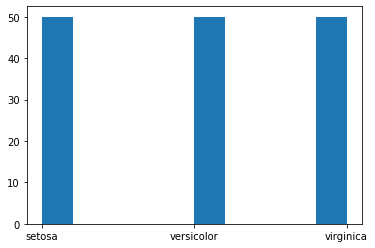

In [6]:
plt.hist(data.Species)

In [7]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [9]:
import numpy as np
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [10]:
# genero un set de entrenamiento con un subconjunto de mis datos
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

In [11]:
pd.DataFrame(data.is_train)

,is_train
0,True
1,True
2,True
3,True
4,False
...,...
145,True
146,False
147,False
148,True


In [12]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# si no hay 20 nodos, no me digas nada

tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

# entreno mi modelo para que me permita predecir la especie

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [15]:
preds = tree.predict(test[predictors])
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

In [16]:
test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
4,5.0,3.6,1.4,0.2,setosa,False
7,5.0,3.4,1.5,0.2,setosa,False
10,5.4,3.7,1.5,0.2,setosa,False
11,4.8,3.4,1.6,0.2,setosa,False
14,5.8,4.0,1.2,0.2,setosa,False
17,5.1,3.5,1.4,0.3,setosa,False
18,5.7,3.8,1.7,0.3,setosa,False
21,5.1,3.7,1.5,0.4,setosa,False
23,5.1,3.3,1.7,0.5,setosa,False
27,5.2,3.5,1.5,0.2,setosa,False


In [17]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

# Comparamos la predicción con el valor real

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,15,3
virginica,0,0,16


## Visualización del árbol de decisión

In [18]:
from sklearn.tree import export_graphviz

In [19]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [20]:
import os
from graphviz import Source

In [21]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.583\\nsamples = 102\\nvalue = [36, 32, 34]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.7\\nentropy = 0.999\\nsamples = 66\\nvalue = [0, 32, 34]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.323\\nsamples = 34\\nvalue = [0, 32, 2]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 0, 32]"] ;\n2 -> 6 ;\n}'

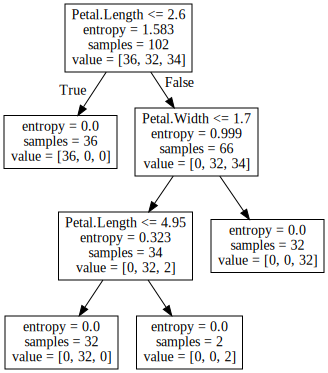

In [22]:
Source(text)

## Cross Validation para la poda

In [23]:
X = data[predictors]
Y = data[target]

In [24]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [25]:
from sklearn.model_selection import KFold

In [26]:
cv = KFold(n_splits = X.shape[0], shuffle=True, random_state=1)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

# cuántos quedan mal clasificados
# n_jobs es para paralelismo

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
score = np.mean(scores)
score

# promedio 94.6%

0.9466666666666667

In [30]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits = X.shape[0], shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.3333333333333333
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9533333333333334
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9533333333333334
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9466666666666667
    [0.         0.         0.66869158 0.33130842]


In [31]:
# profundidad i=3 es la mejor predicción.

predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Usamos el randomForestCassifier para clasificación
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [35]:
forest.oob_decision_function_
# función de desición (voto por mayoría)
# se lee con las 4 categorías posibles.

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.91489362, 0.08510638, 0.        ],
       [0.97727273, 0.02272727, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.975     , 0.025     , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [36]:
forest.oob_score_
# r2, muy alto , más alto que con validación cruzada ()

0.9466666666666667